# Numbat example #

Plots of the concentration flux over the top boundary

Chris Green, 2016 (chris.green@csiro.au)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Initially, the mass flux is purely diffusive, in which case the flux over the top boundary scales as $\sqrt(1/(\pi t))$ where $t$ is time.

In [2]:
tdata = np.linspace(1,5000, 100)
cdata = np.sqrt(1/(np.pi * tdata))

## 2D cases ##

Read in the data from the 2D examples and plot it. For the 2D cases, the width of the top boundary is 1000 m.

There are two 2D examples: an isotropic model (2Dddc.i), and an anisotropic model (2Dddc2.i) with $\gamma = 0.5$. The isotropic simulation runs for 2500 seconds, the anisotropic simulation runs for 5000 seconds. 

In [3]:
moosedata2D = pd.read_csv('../../examples/2D/2Dddc.csv', header = 0)
moosedata2D2 = pd.read_csv('../../examples/2D/2Dddc2.csv', header = 0)
width = 1000

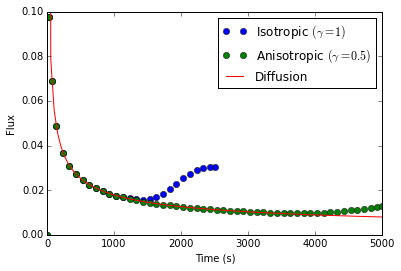

In [4]:
plt.plot(moosedata2D.time, -moosedata2D.boundaryfluxint / width, 'o', label = 'Isotropic $(\gamma=1)$',markevery=1)
plt.plot(moosedata2D2.time, -moosedata2D2.boundaryfluxint / width, 'o', label = 'Anisotropic $(\gamma=0.5)$',markevery=1)
plt.plot(tdata, cdata, label = 'Diffusion')
plt.xlabel('Time (s)')
plt.ylabel('Flux')
plt.legend(loc = 'best')
plt.ylim([0,0.1]);

## Psuedo 2D model using 3D mesh ##

In this example, a pseudo representation of the 2D model above is created with a 3D mesh with only a single element in the *y* direction.

Read in the data from the 3D case and plot it against the above 2D results. For the 3D case, the cross-sectional area of the top boundary is 1000 * 1 m$^2$.

In [11]:
moosedata2Dp = pd.read_csv('../../examples/3D/pseudo2D/3Dddcp.csv', header = 0)
area = 1000

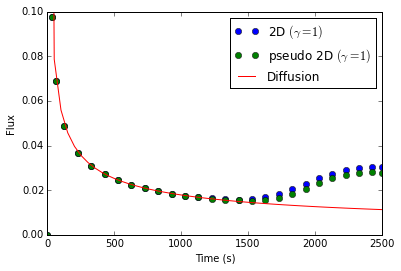

In [12]:
plt.plot(moosedata2D.time, -moosedata2D.boundaryfluxint / width, 'o', label = '2D $(\gamma=1)$',markevery=1)
plt.plot(moosedata2Dp.time, -moosedata2Dp.boundaryfluxint / area, 'o', label = 'pseudo 2D $(\gamma=1)$',markevery=1)
plt.plot(tdata, cdata, label = 'Diffusion')
plt.xlabel('Time (s)')
plt.ylabel('Flux')
plt.legend(loc = 'best')
plt.ylim([0,0.1]);
plt.xlim([0,2500]);

The flux over the top boundary is slightly delayed in the 3D case, but shows that the 3D model approximates the 2D model well.

## 3D case ##

Read in the data from the 3D test and plot it. For the 3D case, the cross-sectional area of the top boundary is 200 * 200 m$^2$.

In [19]:
moosedata3D = pd.read_csv('../../examples/3D/isotropic/3Dddc.csv', header = 0)
area = 200 * 200

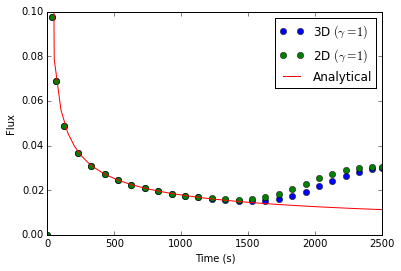

In [22]:
plt.plot(moosedata3D.time, -moosedata3D.boundaryfluxint / area, 'o', label = '3D $(\gamma=1)$', markevery=1)
plt.plot(moosedata2D.time, -moosedata2D.boundaryfluxint / width, 'o', label = '2D $(\gamma=1)$',markevery=1)
plt.plot(tdata, cdata, label = 'Analytical')
plt.xlabel('Time (s)')
plt.ylabel('Flux')
plt.legend(loc = 'best')
plt.ylim([0,0.1]);
plt.xlim([0,2500]);